In [39]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
G = nx.read_edgelist('3.graph.txt', create_using=nx.MultiDiGraph())
print(len(G.node()))
print((len(G.edges)))

2000
4000


In [6]:
 def get_X(G):
    result = defaultdict(int)
    for u, v in G.edges():
        result[(G.degree(u), G.degree(v))] += 1
        result[(G.degree(v), G.degree(u))] += 1
    return result

In [30]:
degrees = set(dict(G.degree()).values())
X = get_X(G)

degs = []
assorts = []
for d in sorted(degrees):
    dnn = float(sum(d1 * X[(d1, d)] for d1 in degrees)) / sum(X[(d1, d)] for d1 in degrees)
    degs.append(d)
    assorts.append(dnn)


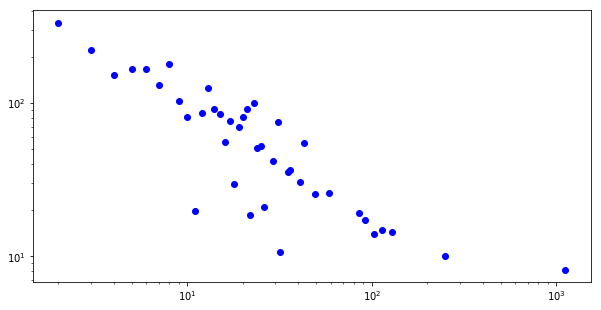

In [36]:
plt.figure(figsize=(10,5))
plt.loglog(degs, assorts, ls='None', marker='o', color='b')
plt.show()

In [46]:
def func(d, c, delta):
    return c * d**delta

approx = curve_fit(func, xdata=degs, ydata=assorts)

In [49]:
print('answer: ', -(approx[0][1]))

answer:  0.723625445924517


In [50]:
approx[0]

array([527.58855763,  -0.72362545])

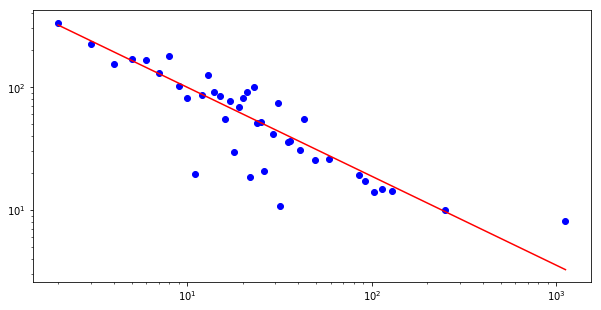

In [53]:
plt.figure(figsize=(10,5))
plt.loglog(degs, assorts, ls='None', marker='o', color='b')
plt.plot(degs, func(degs, approx[0][0], approx[0][1]), 'r-')
plt.show()